In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df=pd.read_csv('Jamboree_Admission.csv')

In [3]:
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
#to check the shape of the dataset
df.shape

(500, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
#drop the irrlevent column from the dataset
df.drop(columns=['Serial No.'],inplace=True)

In [7]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
#to check the null values from the dataset
df.isnull().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0



**Lets see the distribution of the variables of graduate applicants.**

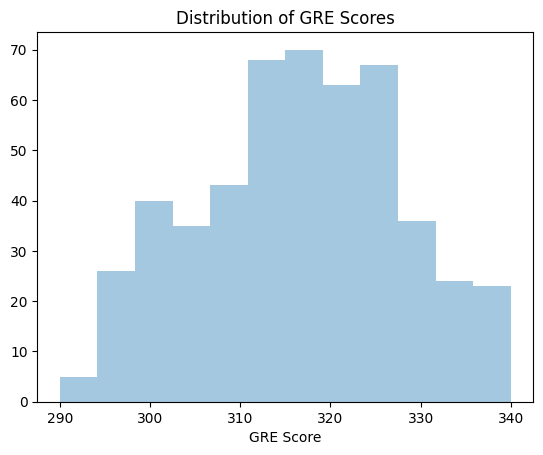

In [9]:
fig = sns.distplot(df['GRE Score'], kde=False)
plt.title("Distribution of GRE Scores")
plt.show()

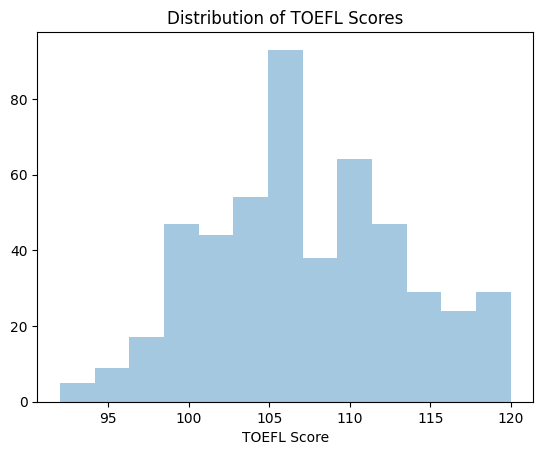

In [10]:
fig= sns.distplot(df['TOEFL Score'], kde=False)
plt.title("Distribution of TOEFL Scores")
plt.show()

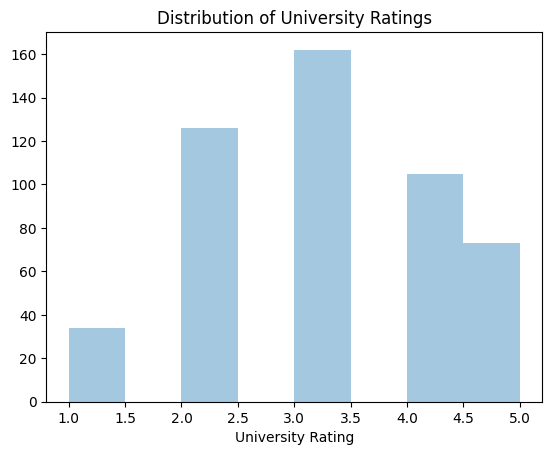

In [11]:
fig= sns.distplot(df['University Rating'], kde=False)
plt.title("Distribution of University Ratings")
plt.show()

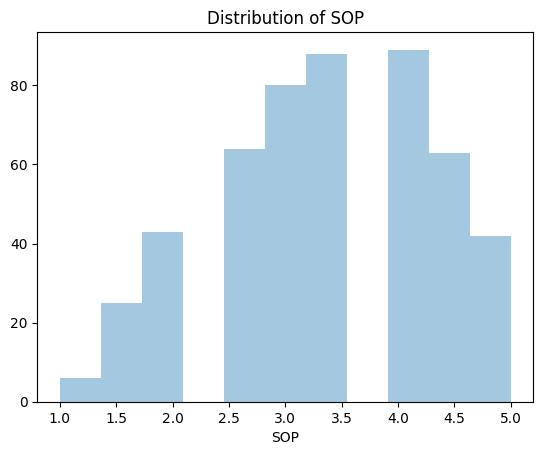

In [12]:
fig=sns.distplot(df['SOP'],kde=False)
plt.title("Distribution of SOP")
plt.show()

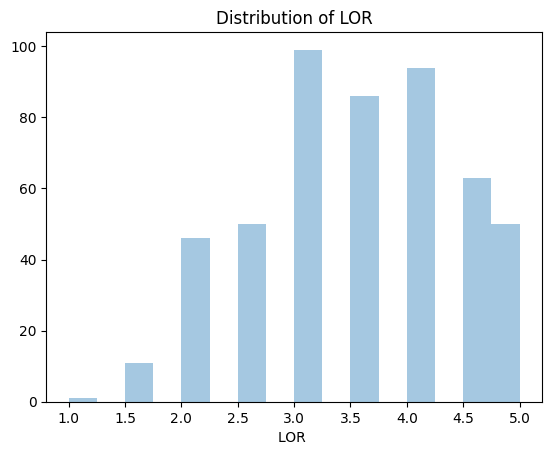

In [13]:
fig=sns.distplot(df['LOR '],kde=False)
plt.title("Distribution of LOR")
plt.show()

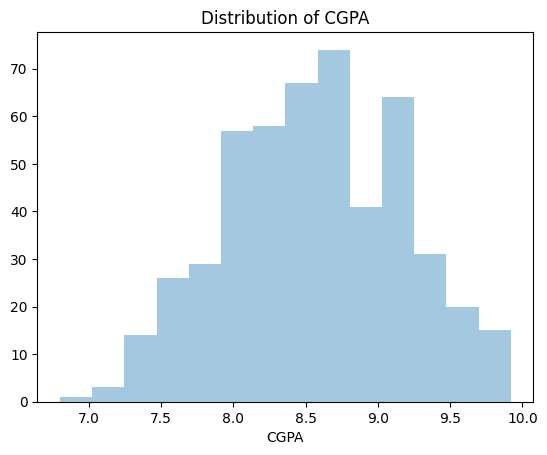

In [14]:
fig=sns.distplot(df['CGPA'],kde=False)
plt.title("Distribution of CGPA")
plt.show()

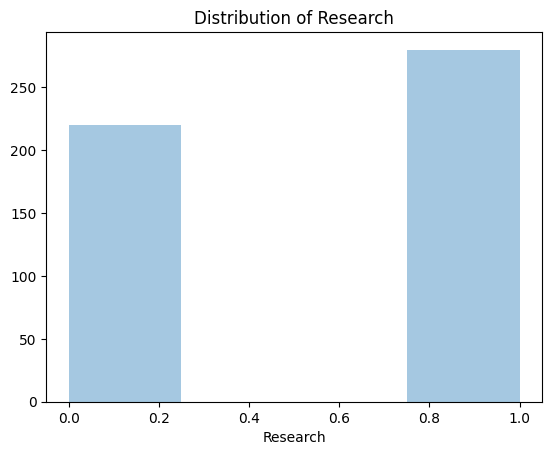

In [15]:
fig=sns.distplot(df['Research'],kde=False)
plt.title("Distribution of Research")
plt.show()

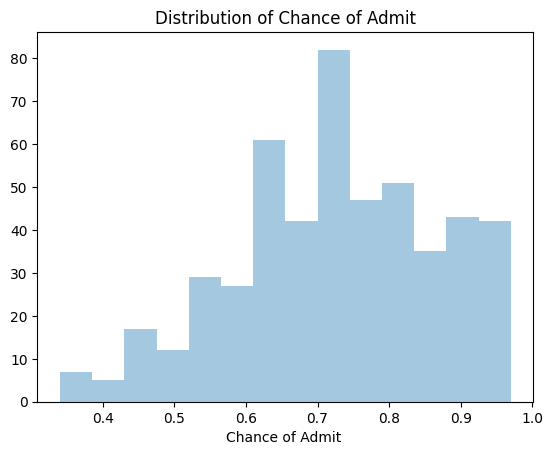

In [16]:
fig=sns.distplot(df['Chance of Admit '],kde=False)
plt.title("Distribution of Chance of Admit")
plt.show()

**Understanding the relationship between different factors responsible for graduate admissions.**

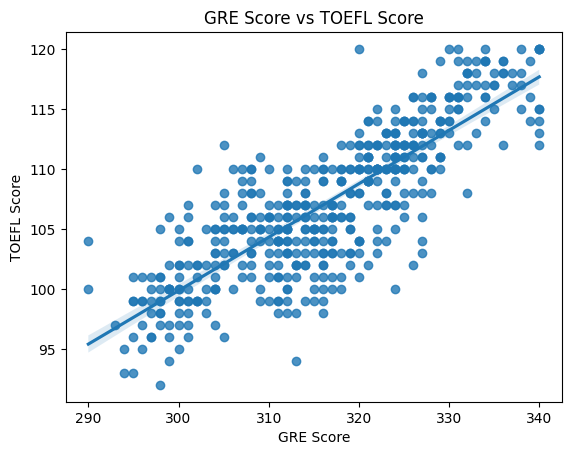

In [17]:
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=df)
plt.title("GRE Score vs TOEFL Score")
plt.show()

People with higher GRE Scores also have higher TOEFL Scores which is justified because both TOEFL and GRE have a verbal section which although not similar are relatable

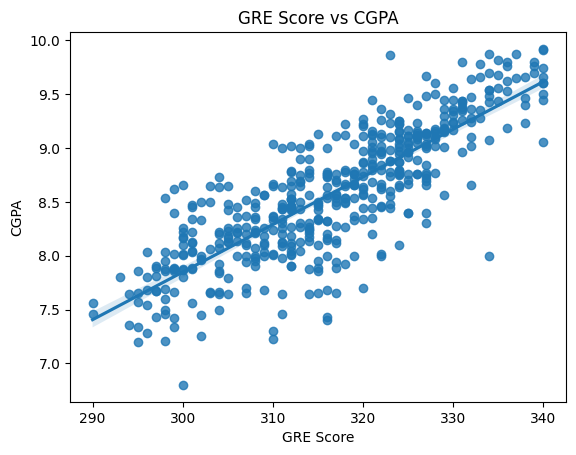

In [18]:

fig = sns.regplot(x="GRE Score", y="CGPA", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

Although there are exceptions, people with higher CGPA usually have higher GRE scores maybe because they are smart or hard working

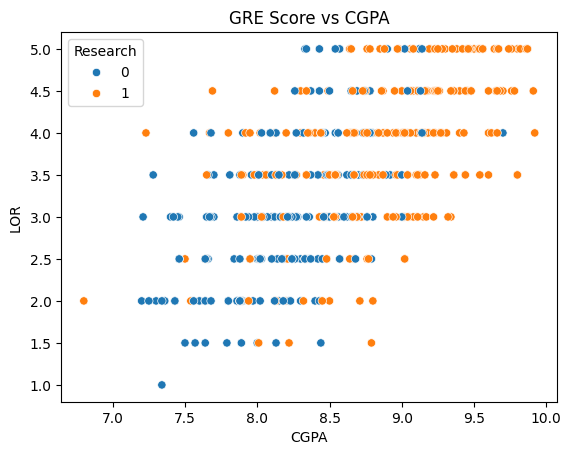

In [19]:
fig = sns.scatterplot(x="CGPA", y="LOR ", data=df, hue="Research")
plt.title("GRE Score vs CGPA")
plt.show()

LORs are not that related with CGPA so it is clear that a persons LOR is not dependent on that persons academic excellence. Having research experience is usually related with a good LOR which might be justified by the fact that supervisors have personal interaction with the students performing research which usually results in good LORs

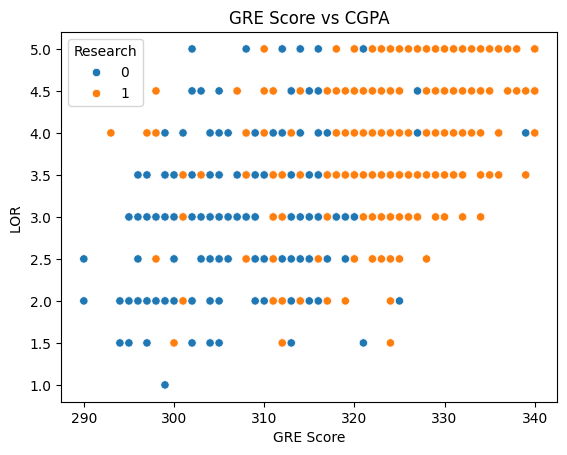

In [20]:
fig = sns.scatterplot(x="GRE Score", y="LOR ", data=df, hue="Research")
plt.title("GRE Score vs CGPA")
plt.show()

GRE Score and LOR are not related.Pepole are different kind have laa kind of GREs score

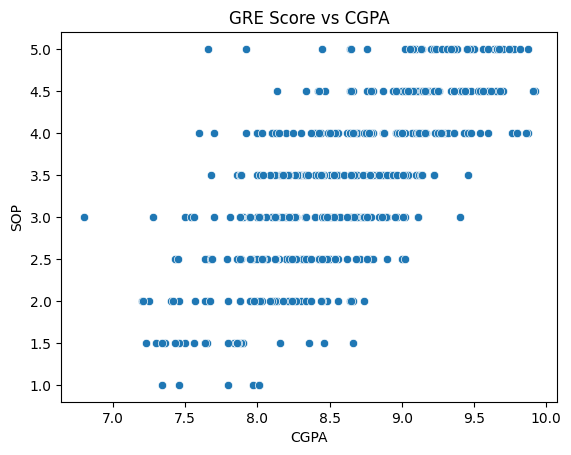

In [21]:
fig = sns.scatterplot(x="CGPA", y="SOP", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

CGPA and SOP are not that related because Statement of Purpose is related to academic performance, but since people with good CGPA tend to be more hard working so they have good things to say in their SOP which might explain the slight move towards higher CGPA as along with good SOPs

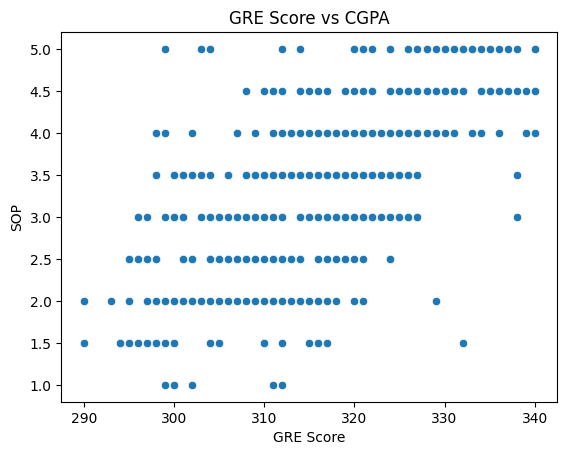

In [22]:
fig = sns.scatterplot(x="GRE Score", y="SOP", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

GRE Score and CGPA is only slightly related

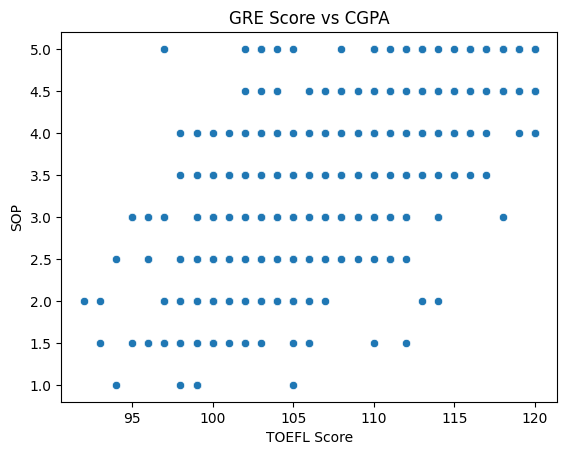

In [23]:
fig = sns.scatterplot(x="TOEFL Score", y="SOP", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

Applicants with different kinds of SOP have different kinds of TOEFL Score

**Check correlation among independent variables and how they interact with each other.**

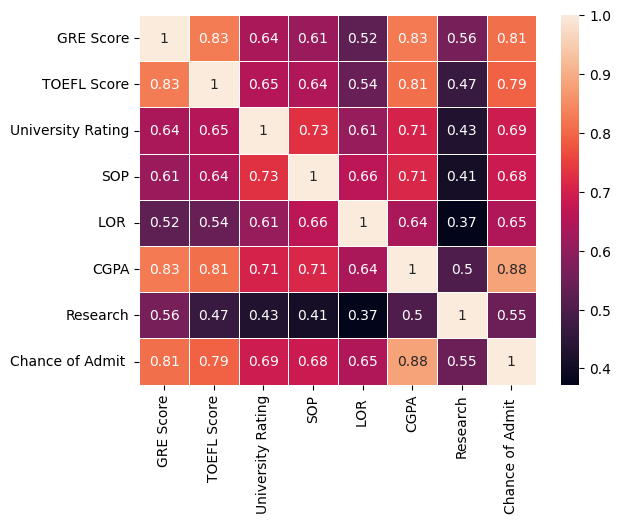

In [24]:
corr = df.corr()
sns.heatmap(corr, linewidths=.5, annot=True)
plt.show()

**split the dataset with training and testing set and prepare the inputs and outputs**

In [25]:
X = df.drop(['Chance of Admit '], axis=1)
y = df['Chance of Admit ']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=True)

In [27]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
170,312,101,2,2.5,3.5,8.04,1
354,297,98,2,2.5,3.0,7.67,0
244,314,107,2,2.5,4.0,8.56,0
276,329,113,5,5.0,4.5,9.45,1
360,322,110,3,4.0,5.0,8.64,1
...,...,...,...,...,...,...,...
63,315,107,2,4.0,3.0,8.50,1
282,312,106,3,4.0,3.5,8.79,1
348,302,99,1,2.0,2.0,7.25,0
309,308,110,4,3.5,3.0,8.60,0


In [28]:
y_train

,Chance of Admit
170,0.68
354,0.59
244,0.63
276,0.89
360,0.85
...,...
63,0.56
282,0.81
348,0.57
309,0.70


In [29]:
X_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
469,326,114,4,4.0,3.5,9.16,1
299,305,112,3,3.0,3.5,8.65,0
60,309,100,2,3.0,3.0,8.10,0
9,323,108,3,3.5,3.0,8.60,0
86,315,106,3,4.5,3.5,8.42,0
...,...,...,...,...,...,...,...
104,326,112,3,3.5,3.0,9.05,1
300,309,106,2,2.5,2.5,8.00,0
205,295,99,2,2.5,3.0,7.65,0
392,326,112,4,4.0,3.5,9.12,1


In [30]:
y_test

,Chance of Admit
469,0.86
299,0.71
60,0.48
9,0.45
86,0.72
...,...
104,0.74
300,0.62
205,0.57
392,0.84


In [31]:
#Standardization
from sklearn.preprocessing import StandardScaler
X_train_columns=X_train.columns
std=StandardScaler()
X_train_std=std.fit_transform(X_train)

In [32]:
X_train_std

array([[-0.42304923, -1.05096936, -0.96947159, ...,  0.03397746,
        -0.8947108 ,  0.89091075],
       [-1.76393427, -1.54945285, -0.96947159, ..., -0.5096619 ,
        -1.50591412, -1.12244688],
       [-0.24426456, -0.05400238, -0.96947159, ...,  0.57761682,
        -0.03572236, -1.12244688],
       ...,
       [-1.31697259, -1.38329168, -1.83700768, ..., -1.59694062,
        -2.19971249, -1.12244688],
       [-0.78061858,  0.44448111,  0.76560061, ..., -0.5096619 ,
         0.03035368, -1.12244688],
       [-0.15487222, -0.3863247 , -0.10193549, ..., -1.05330126,
        -0.16787443, -1.12244688]])

In [33]:
X_train=pd.DataFrame(X_train_std, columns=X_train_columns)

In [34]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,-0.423049,-1.050969,-0.969472,-0.860366,0.033977,-0.894711,0.890911
1,-1.763934,-1.549453,-0.969472,-0.860366,-0.509662,-1.505914,-1.122447
2,-0.244265,-0.054002,-0.969472,-0.860366,0.577617,-0.035722,-1.122447
3,1.096620,0.942965,1.633137,1.640697,1.121256,1.434469,0.890911
4,0.470874,0.444481,-0.101935,0.640272,1.664896,0.096430,0.890911
...,...,...,...,...,...,...,...
395,-0.154872,-0.054002,-0.969472,0.640272,-0.509662,-0.134836,0.890911
396,-0.423049,-0.220164,-0.101935,0.640272,0.033977,0.344215,0.890911
397,-1.316973,-1.383292,-1.837008,-1.360578,-1.596941,-2.199712,-1.122447
398,-0.780619,0.444481,0.765601,0.140060,-0.509662,0.030354,-1.122447


In [35]:
def adjusted_r2(r2,y,x):
    adjr2 = 1 - (((1-r2)*(len(y)-1))/(len(y)-x.shape[1]-1))
    return adjr2


In [36]:
# Let's check from degree = 1 to degree = 20 to select which model is the best

degree = 20
train_scores=[] # This list holds all the R2 values for training dataset
test_scores=[] # This list holds all the R2 values for testing dataset

train_loss =[] # This list holds all the mean_squared_error for training dataset
test_loss=[] # This list holds all the mean_squared_error for test dataset

for i in range(1,degree):

    poly_reg = make_pipeline(PolynomialFeatures(i),LinearRegression())
    poly_reg.fit(X_train,y_train)

    # R2 values are calculated
    train_score=poly_reg.score(X_train,y_train)
    test_score=poly_reg.score(X_test,y_test)

    # Append adjusted R-squared values to the lists
    train_scores.append(adjusted_r2(train_score,y_train,X_train))
    test_scores.append(adjusted_r2(test_score,y_test,X_test))

    # Outputs of train and test data
    output_train=poly_reg.predict(X_train)
    output_test = poly_reg.predict(X_test)

    # Loss values are getting appended
    train_loss.append(mean_squared_error(y_train,output_train))
    test_loss.append(mean_squared_error(y_test,output_test))

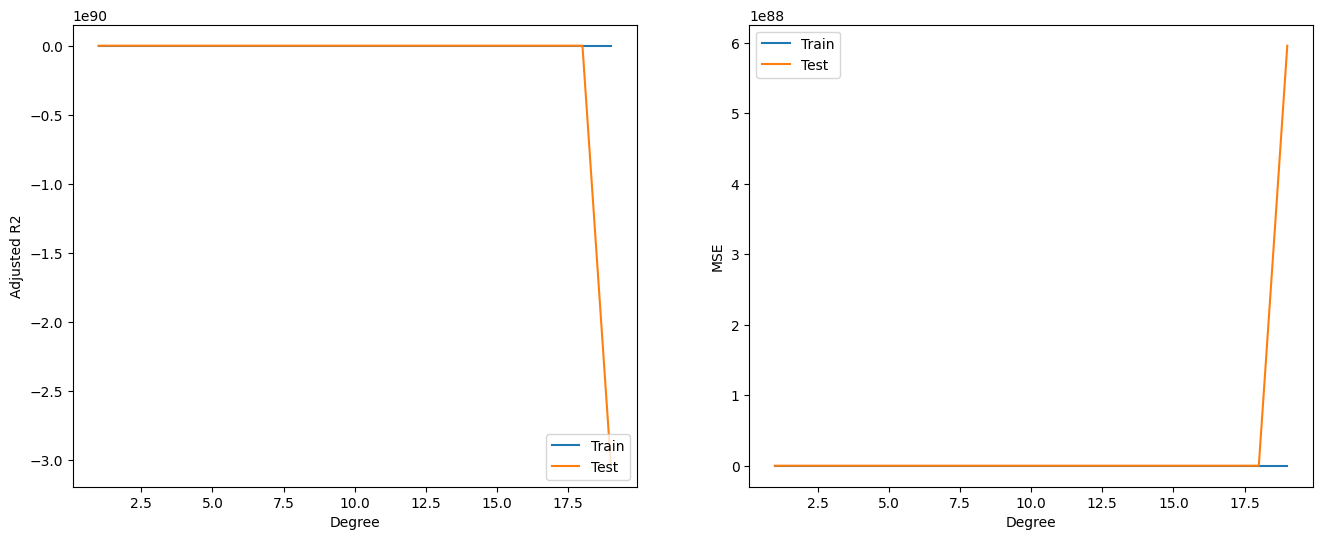

In [37]:
fig,axes=plt.subplots(1,2,figsize=(16,6))
axes[0].plot(list(range(1,20)),train_scores,label='Train')
axes[0].plot(list(range(1,20)),test_scores, label='Test')
axes[0].set_xlabel('Degree')
axes[0].set_ylabel('Adjusted R2')
axes[0].legend(loc='lower right')

axes[1].plot(list(range(1,20)),train_loss,label='Train')
axes[1].plot(list(range(1,20)),test_loss, label='Test')
axes[1].set_xlabel('Degree')
axes[1].set_ylabel('MSE')
axes[1].legend(loc='upper left')
plt.show()

Observations from the Degree of polynomial vs Adjusted R-score and MSE
* As we can see in the above plot, the adjusted R-score starts decreasing for the test data after the degree of around 17.5, which implies the model is overfitting the train dataset for higher degrees.
* We can also see that Mean squared error is increasing significantly for the test data after degree of around 17.5, so more than degree 17.5 is not advisable.


* According to the Occam Razor's principle a model performs best when it is simple, so we are considering degree of 1 as we do not want to complicate the model with higher degree.
* Moreover in previous part of analysis we saw that the correlation coefficients of pearson correlation and spearman correlation is almost equal which says that the data lacks polynomial relationship.

## Assumptions of Linear Regression
* Linearity of the data.
* No multicollinearity.
* Normality of Residuals
* No heteroskedacity
* No autocorrelation

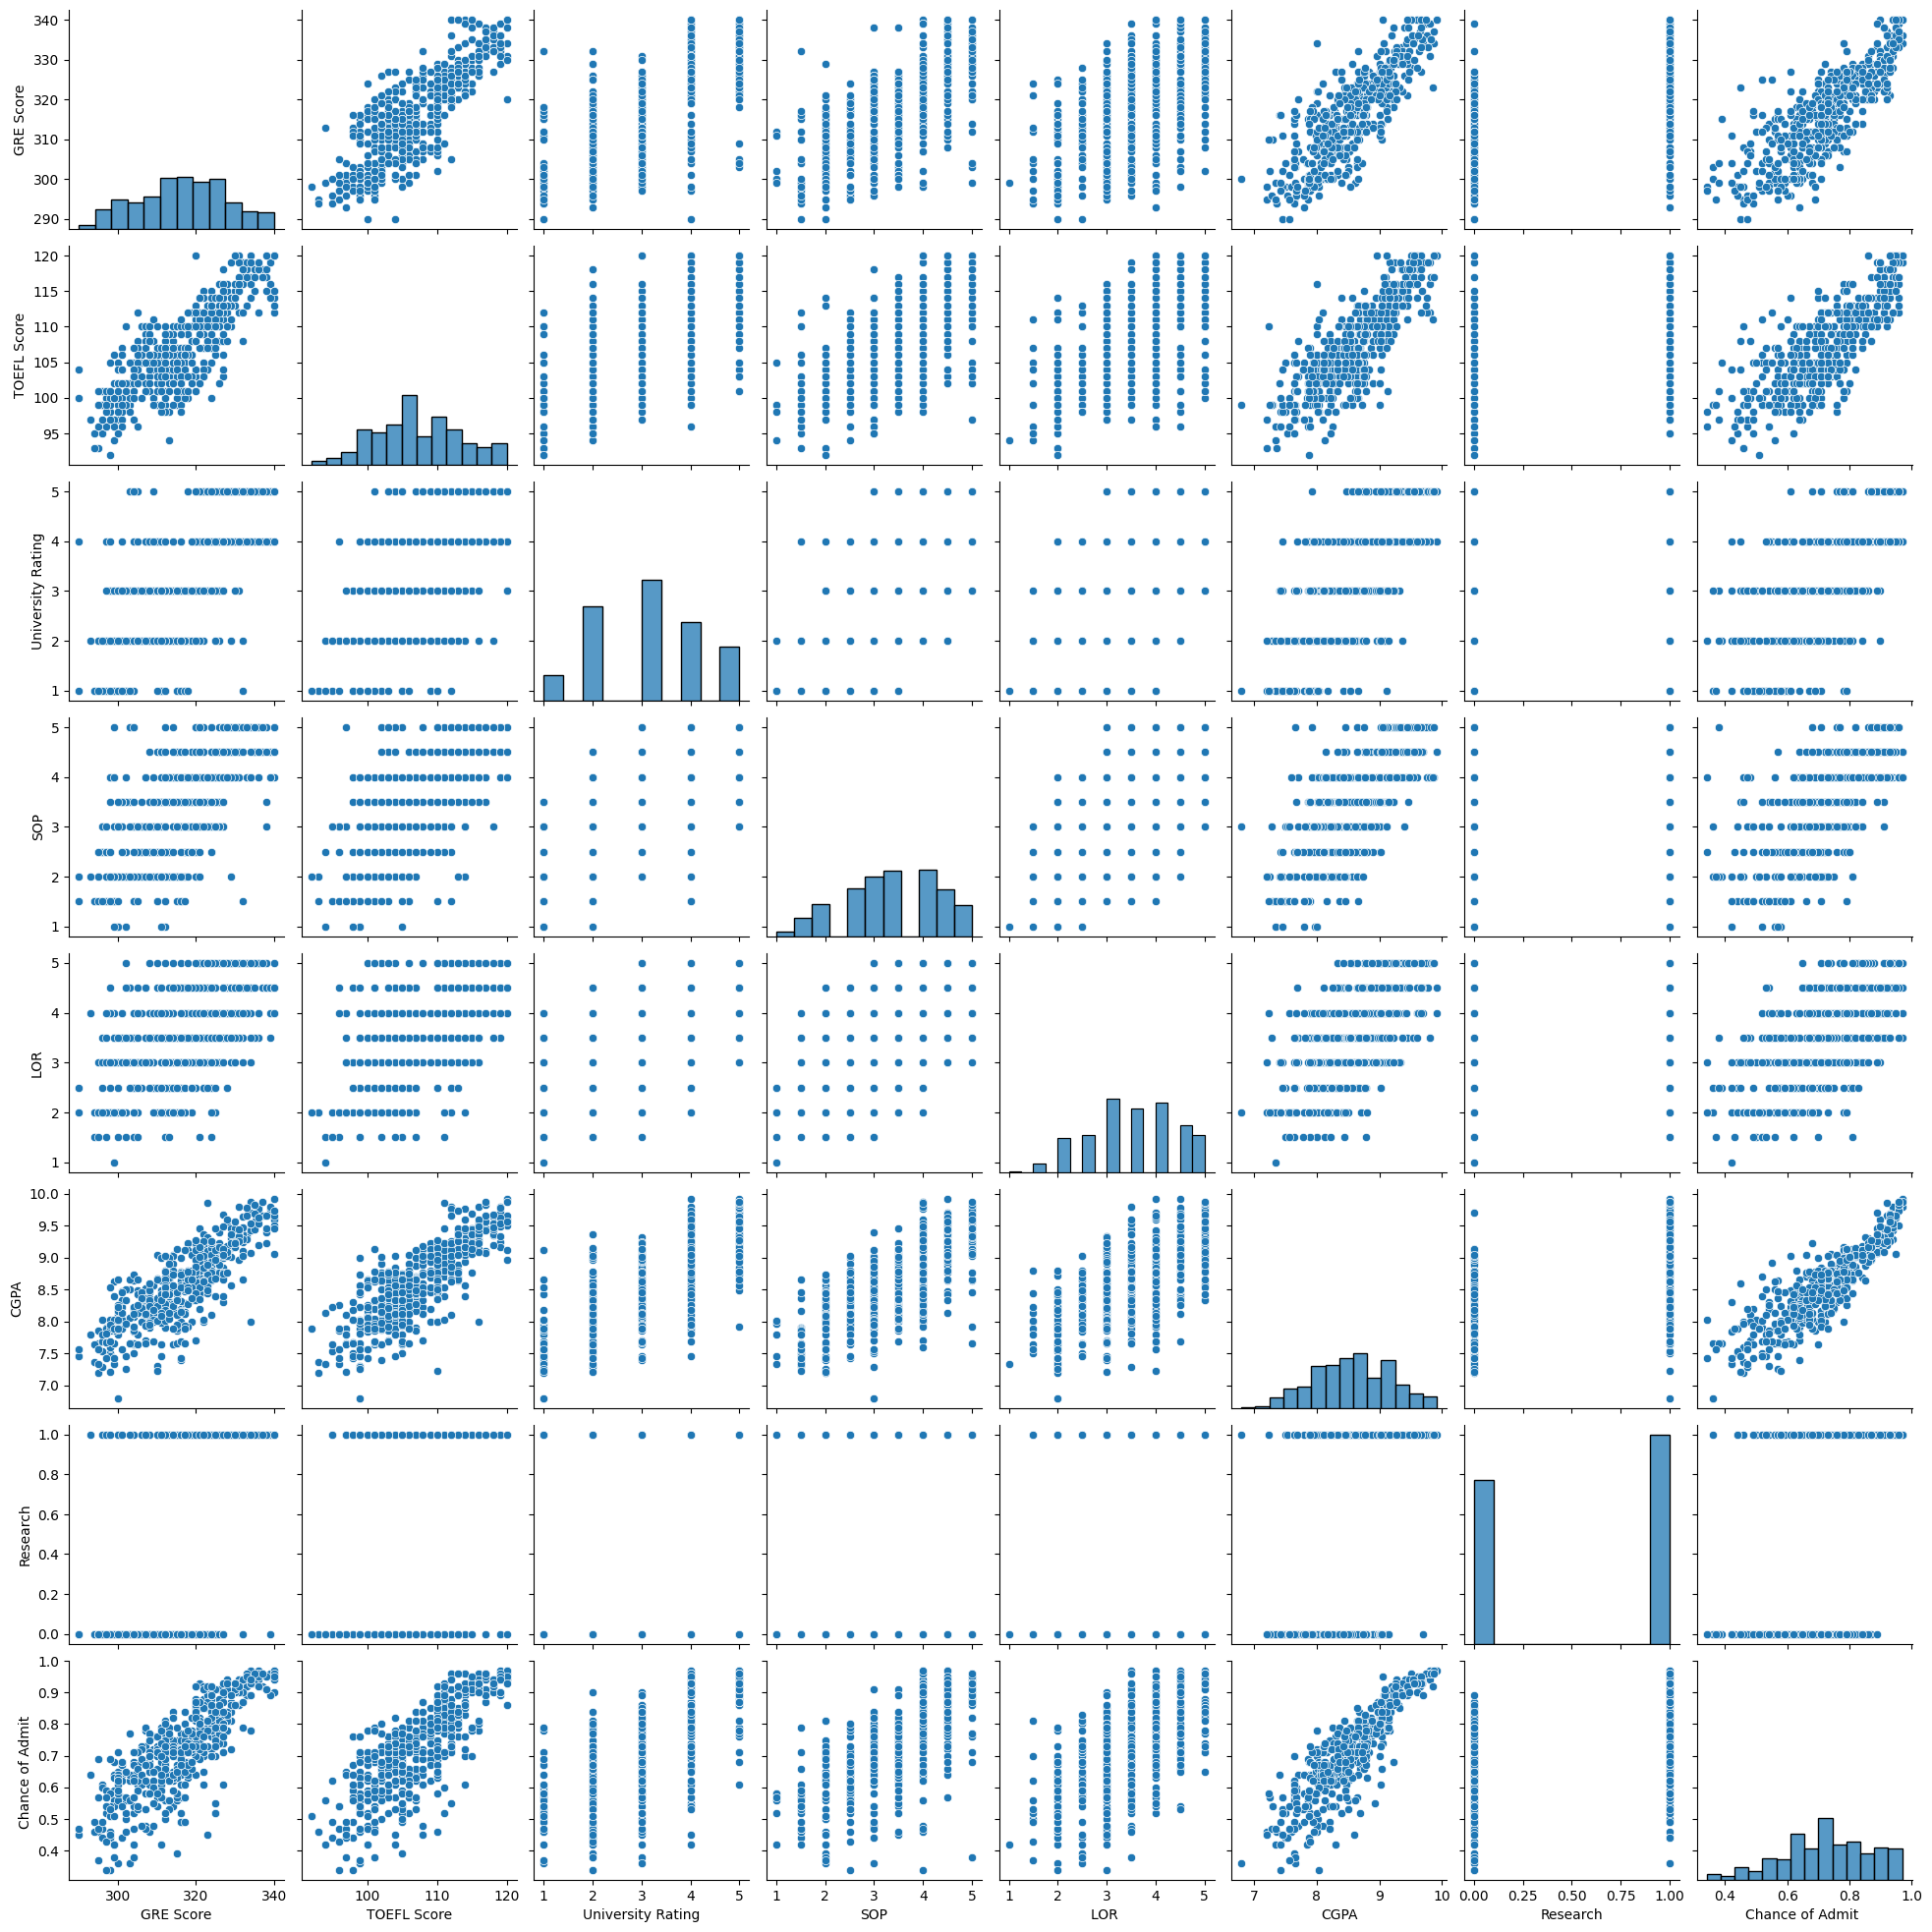

In [38]:
sns.pairplot(df)

most all of the independent variables are having a linearly increasing relationship with admission_chance which is our dependent variable.

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.metrics import mean_squared_error
models = [
           ['Linear Regression :', LinearRegression()],

          ['Lasso Regression :', Lasso(alpha=0.1)], #try with different alpha values
          ['Ridge Regression :', Ridge(alpha=1.0)] #try with different alpha values
          ]

print("Results without removing features with multicollinearity ...")


for name,model in models:
    model.fit(X_train, y_train.values)
    predictions = model.predict(std.transform(X_test))
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))


Results without removing features with multicollinearity ...
Linear Regression : 0.06179022210333817
Lasso Regression : 0.126053378255212
Ridge Regression : 0.061811196194647186


## Linear Regression using Statsmodel library

- Adjusted. R-squared reflects the fit of the model. R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
- const coefficient is your Y-intercept. It means that if both the Interest_Rate and Unemployment_Rate coefficients are zero, then the expected output (i.e., the Y) would be equal to the const coefficient.
- Interest_Rate coefficient represents the change in the output Y due to a change of one unit in the interest rate (everything else held constant)
- Unemployment_Rate coefficient represents the change in the output Y due to a change of one unit in the unemployment rate (everything else held constant)
- std err reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of accuracy
- P >|t| is your p-value. A p-value of less than 0.05 is considered to be statistically significant
- Confidence Interval represents the range in which our coefficients are likely to fall (with a likelihood of 95%)

In [40]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train.values, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     256.0
Date:                Thu, 08 Aug 2024   Prob (F-statistic):          6.33e-142
Time:                        10:25:15   Log-Likelihood:                 563.06
No. Observations:                 400   AIC:                            -1110.
Df Residuals:                     392   BIC:                            -1078.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7248      0.00

In [41]:
X_train_new=X_train.drop(columns='SOP')

In [42]:
model1 = sm.OLS(y_train.values, X_train_new).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     298.8
Date:                Thu, 08 Aug 2024   Prob (F-statistic):          4.90e-143
Time:                        10:25:15   Log-Likelihood:                 562.72
No. Observations:                 400   AIC:                            -1111.
Df Residuals:                     393   BIC:                            -1083.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7248      0.00

**Multicollinearity check by VIF score**


- “ VIF score of an independent variable represents how well the variable is
explained by other independent variables.

- So, the closer the R^2 value to 1, the higher the value of VIF and the higher the multicollinearity with the particular independent variable.

In [43]:
def calculate_vif(dataset,col):
  dataset=dataset.drop(columns=col,axis=1)
  vif=pd.DataFrame()
  vif['features']=dataset.columns
  vif['VIF_Value']=[variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
  return vif


In [44]:
calculate_vif(X_train_new,[])

,features,VIF_Value
0,const,1.000000
1,GRE Score,4.386354
2,TOEFL Score,3.853873
3,University Rating,2.127874
4,LOR,1.840807
5,CGPA,4.721911
6,Research,1.614519


VIF(Variance Inflation Factor) look like fine hence we can go ahead with prediction

In [45]:
X_test_std= std.transform(X_test)

In [46]:
X_test=pd.DataFrame(X_test_std, columns=X_train_columns) # col name same as train datasets


In [47]:
X_test = sm.add_constant(X_test)
X_test_del=list(set(X_test.columns).difference(set(X_train_new.columns)))

In [48]:
print(f'Dropping {X_test_del} from test set')

Dropping ['SOP'] from test set


In [49]:
X_test_new=X_test.drop(columns=X_test_del)

In [50]:
#Prediction from the clean model
pred = model1.predict(X_test_new)

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

print('Mean Absolute Error ', mean_absolute_error(y_test.values,pred) )
print('Root Mean Square Error ', np.sqrt(mean_squared_error(y_test.values,pred) ))

Mean Absolute Error  0.043301761717339425
Root Mean Square Error  0.06150202709553357


**Mean of residuals**


In [51]:
residuals = y_test.values-pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -0.00870576462350821


**Test for Homoscedasticity**


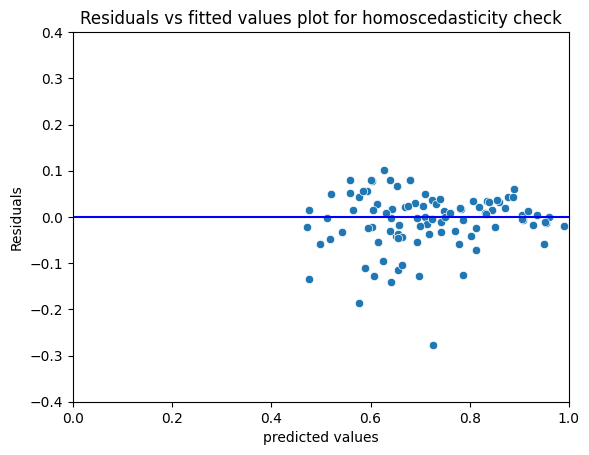

In [52]:
p = sns.scatterplot(x=pred,y=residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.4,0.4)
plt.xlim(0,1)
p = sns.lineplot(x=[0,26], y=[0,0], color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [53]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_test)
lzip(name, test)

[('F statistic', 0.5382301196472336), ('p-value', 0.9761411781565852)]

#### Here `null hypothesis` is - error terms are homoscedastic and since
p-values >0.05, we fail to reject the null hypothesis

** Normality of residuals**

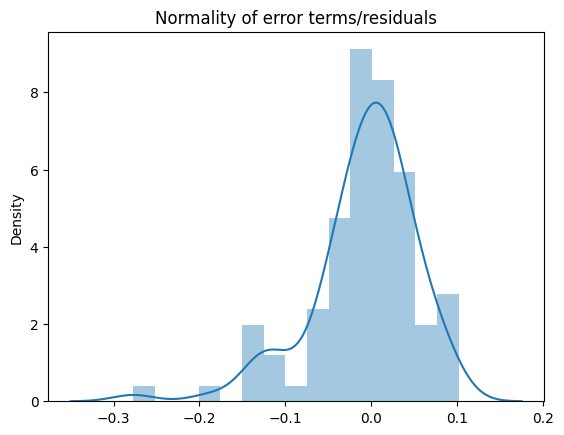

In [54]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

Text(0, 0.5, 'y_pred')

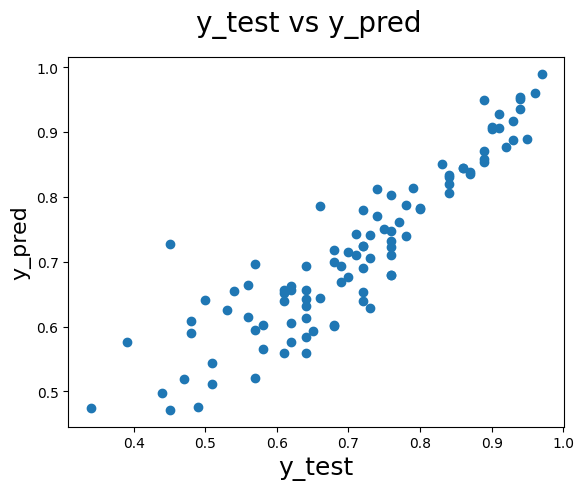

In [55]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test.values, pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

### Correlation and Key findings:
* All variables have a positive correlation with the "Chance of Admit".
* CGPA, TOEFL, and GRE are the most positively correlated with admission chances.
* Students with a research background have a significantly higher likelihood of admission.
*   The more preferred model is one with low bias and low varinace.
*   




### Recommendations for Jamboree Education
**Focus on Key Metrics**: Encourage students to prioritize improving their GRE, TOEFL scores and LOR as these have the strongest correlation with admission chances.

**Promote Research Experience**: Given its positive correlation with admission chances, students should be informed about the importance of having a research background.